In [1]:
import pandas as pd
import numpy as np
import csv
import random

# Read in the file

In [2]:
leaves = pd.read_csv("leaf/leaf.csv")
leaves

,class,number,eccentricity,aspect_ratio,elongation,solidity,convexity,iso_factor,depth,lobedness,intensity,contrast,smoothness,third_moment,uniformity,entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
5,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.844820,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068
6,1,7,0.82063,1.7529,0.44458,0.97964,0.99649,0.767700,0.005928,0.006395,0.018375,0.080587,0.006452,0.002271,0.000041,0.53904
7,1,8,0.77982,1.6215,0.39222,0.98512,0.99825,0.808160,0.005099,0.004731,0.024875,0.089686,0.007979,0.002466,0.000147,0.66975
8,1,9,0.83089,1.8199,0.45693,0.98240,1.00000,0.771060,0.006005,0.006564,0.007245,0.040616,0.001647,0.000388,0.000033,0.33696
9,1,10,0.90631,2.3906,0.58336,0.97683,0.99825,0.664190,0.008402,0.012848,0.007010,0.042347,0.001790,0.000459,0.000028,0.28082


# a. Randomly pick 5 samples from each class for training

In [3]:
def select_random(num):
    
    train = pd.DataFrame(columns=["class", "number", "eccentricity", "aspect_ratio", "elongation", "solidity", "convexity", "iso_factor", "depth", "lobedness", "intensity", "contrast", "smoothness", "third_moment", "uniformity", "entropy"])
    test = pd.DataFrame(columns=["class", "number", "eccentricity", "aspect_ratio", "elongation", "solidity", "convexity", "iso_factor", "depth", "lobedness", "intensity", "contrast", "smoothness", "third_moment", "uniformity", "entropy"])
    
    # There are 36 total classes
    for x in range(1, 37):
        # For some reason, classes 16 through 21 are missing
        # So skip these, because the dataframe will be empty
        if(x > 15 and x < 22):
            continue
        
        # If the class number is valid, take that class and re-index starting from 0
        leaf_class = leaves.loc[leaves['class'] == x]
        leaf_class = leaf_class.reset_index(drop=True)
        
        # For each class, select num random samples
        for i in range(0, num):
            # Randomly select a position
            pos = random.randrange(0, leaf_class.shape[0])
            
            # Record the sample 
            train = train.append(leaf_class.loc[leaf_class.index[pos]], ignore_index=True)
            
            # remove the sample from the leaf_class so that it will not be re-used
            leaf_class = leaf_class[leaf_class.index != pos]
            leaf_class = leaf_class.reset_index(drop=True)
            
        # After the loop ends, any leftover samples belong in the testing set
        for i in range(0, leaf_class.shape[0]):
            test = test.append(leaf_class.loc[leaf_class.index[i]], ignore_index=True)
        
    return train, test     

In [4]:
train, test = select_random(5)

## b. Perform leave-one-out cross-validation (LOOCV) for k = 1, 3, 5, 7, 9 to compute their mean accuracies. 

In [5]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

The class column is our "target" which needs to be separated from the rest of the data. Pull it into a y variable for both the training and testing sets. Then, drop the class and number columns of both sets, because these will not be needed for classification.

In [6]:
# The class column is our target, so save as the y variable
train_y = train.iloc[:, 0]
test_y = test.iloc[:, 0]

# The class and number columns are no longer relevant to the X variables
train_X = train.drop(columns=['class', 'number'])
test_X = test.drop(columns=['class', 'number'])

Before we analyze our data, perform feature scaling on the train and test sets

In [7]:
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

Now let's see what results we get from LOOCV on KNN where k = 1, 3, 5, 7, and 9

In [8]:
loocv = LeaveOneOut()

In [25]:
# k = 1
k1 = KNeighborsClassifier(n_neighbors = 1)
res_1 = cross_val_score(k1, train_X, train_y, cv=loocv).mean()
res_1

0.62

In [24]:
# k = 3
k3 = KNeighborsClassifier(n_neighbors = 3)
res_3 = cross_val_score(k3, train_X, train_y, cv=loocv).mean()
res_3

0.5533333333333333

In [26]:
# k = 5
k5 = KNeighborsClassifier(n_neighbors = 5)
res_5 = cross_val_score(k5, train_X, train_y, cv=loocv).mean()
res_5

0.5066666666666667

In [28]:
# k = 7
k7 = KNeighborsClassifier(n_neighbors = 7)
res_7 = cross_val_score(k7, train_X, train_y, cv=loocv).mean()
res_7

0.42

In [29]:
# k = 9
k9 = KNeighborsClassifier(n_neighbors = 9)
res_9 = cross_val_score(k9, train_X, train_y, cv=loocv).mean()
res_9

0.3333333333333333

## c. Use the training examples to build classifiers for k = 1, 3, 5, 7, 9

Creating the KNN classifiers. The output of KNN.score() is the average testing accuracy.

In [30]:
# k = 1
k1.fit(train_X, train_y)
score_1 = k1.score(test_X, test_y)
score_1

0.6631578947368421

In [31]:
# k = 3
k3.fit(train_X, train_y)
score_3 = k3.score(test_X, test_y)
score_3

0.5684210526315789

In [32]:
# k = 5
k5.fit(train_X, train_y)
score_5 = k5.score(test_X, test_y)
score_5

0.5947368421052631

In [33]:
# k = 7
k7.fit(train_X, train_y)
score_7 = k7.score(test_X, test_y)
score_7

0.531578947368421

In [34]:
# k = 9
k9.fit(train_X, train_y)
score_9 = k9.score(test_X, test_y)
score_9

0.5210526315789473

In general, it looks like a higher k value decreases accuracy. Some of the randomized training/testing sets have resulted in an increase in accuracy from k = 5 to k = 7 and then a decrease in k= 9, but this occurs infrequently.

## d. Plot a graph for the results in (b) and (c)

x-axis = k, y-axis = mean accuracies (percentage)

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [36]:
# Defining the axes for the graph
k = [1, 3, 5, 7, 9]
acc_b = [(res_1 * 100), (res_3 * 100), (res_5 * 100), (res_7 * 100), (res_9 * 100)]
acc_c = [(score_1 * 100), (score_3 * 100), (score_5 * 100), (score_7 * 100), (score_9 * 100)]

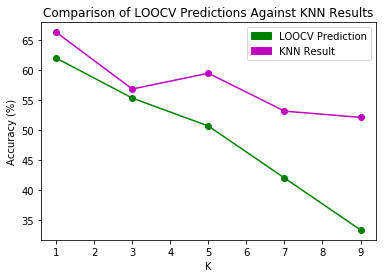

In [68]:
# Lines
plt.plot(k, acc_b, color='g', marker='o')
plt.plot(k, acc_c, color='m', marker='o')
# Legend
b_legend = patches.Patch(color='g', label='LOOCV Prediction')
c_legend = patches.Patch(color='m', label='KNN Result')
plt.legend(handles=[b_legend, c_legend])
# Axes
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
# Title
plt.title('Comparison of LOOCV Predictions Against KNN Results')

plt.show()

## e. Based on LOOCV performance evaluation in (b), which k performs best? Does it correspond to the testing error?